In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first few rows
df.head()

# Check dataset structure
df.info()

# Check for missing values
df.isnull().sum()

# Convert 'TotalCharges' to numeric (handle errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' as it's not useful for analysis
df.drop('customerID', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

# Encode binary categorical columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

# One-hot encode remaining categorical columns
df = pd.get_dummies(df, drop_first=True)

# Check cleaned data
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


Accuracy: 0.7860696517412935
Confusion Matrix:
 [[934  99]
 [202 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407

ROC-AUC Score: 0.8176706130837446


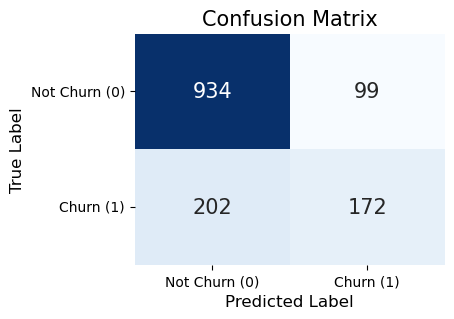

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split    # ERROR !!!!!!!!!!!!!

# Prepare data
X_clf = df.drop('Churn', axis=1)
y_clf = df['Churn']

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Random forest classifier
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train_clf, y_train_clf)

# Predictions
y_pred_clf = clf_model.predict(X_test_clf)
y_proba_clf = clf_model.predict_proba(X_test_clf)[:, 1]  # For ROC-AUC

# Evaluation
print("Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("Classification Report:\n", classification_report(y_test_clf, y_pred_clf))
print("ROC-AUC Score:", roc_auc_score(y_test_clf, y_proba_clf))

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test_clf, y_pred_clf), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            cbar=False,
            annot_kws={'size': 15})
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks([0.5, 1.5], ['Not Churn (0)', 'Churn (1)'])
plt.yticks([0.5, 1.5], ['Not Churn (0)', 'Churn (1)'], rotation=0)
plt.show()

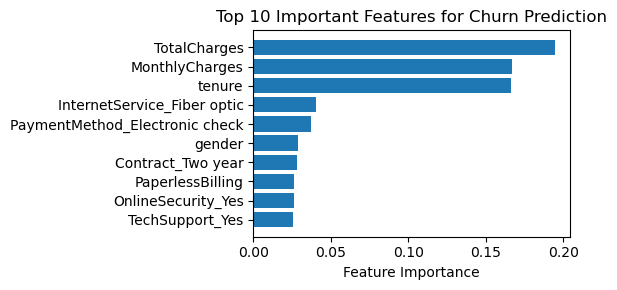

In [7]:
importances = clf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(6, 3))
plt.title("Top 10 Important Features for Churn Prediction")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_clf.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

In [4]:
import scipy.stats as stats

# Reload original data (in case it's been encoded)
df_original = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop missing TotalCharges
df_original = df_original[df_original['TotalCharges'] != ' ']

# Create a contingency table
contingency_table = pd.crosstab(df_original['TechSupport'], df_original['Churn'])

# Show the table
print("Contingency Table:\n", contingency_table)

# Apply Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print("p-value:", p)

# Interpret result
if p < 0.05:
    print("\nConclusion: Reject null hypothesis → Tech Support is associated with Churn")
else:
    print("\nConclusion: Fail to reject null hypothesis → No significant relationship")


Contingency Table:
 Churn                  No   Yes
TechSupport                    
No                   2026  1446
No internet service  1407   113
Yes                  1730   310

Chi-square statistic: 824.925564387502
Degrees of freedom: 2
Expected frequencies:
 [[2549.19453925  922.80546075]
 [1116.00682594  403.99317406]
 [1497.79863481  542.20136519]]
p-value: 7.407807748843711e-180

Conclusion: Reject null hypothesis → Tech Support is associated with Churn


/var/folders/yh/g7kffw4n1pv0rn40j1xbcchr0000gn/T/ipykernel_80677/2495901114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='TechSupport', y='Churn', data=df_original.replace({'Yes': 1, 'No': 0}))


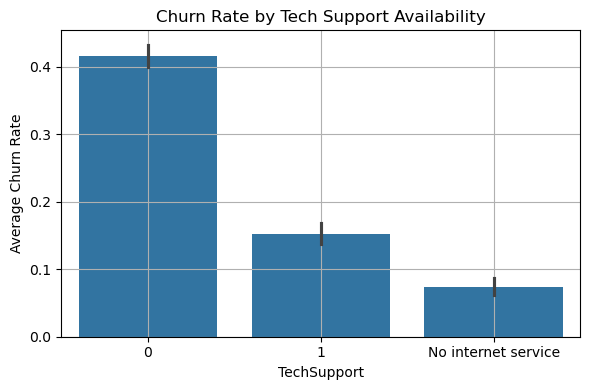

In [5]:
plt.figure(figsize=(6,4))
sns.barplot(x='TechSupport', y='Churn', data=df_original.replace({'Yes': 1, 'No': 0}))
plt.title("Churn Rate by Tech Support Availability")
plt.ylabel("Average Churn Rate")
plt.grid(True)
plt.tight_layout()
plt.show()